# Predicting Diabetes

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# do plotting inline instead of in a separate window

## Load and review data

In [2]:
pima_data = pd.read_csv("./data/pima-data.csv")

In [3]:
pima_data.shape

(768, 10)

In [4]:
pima_data.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
## Check for null values
pima_data.isnull().values.any()

False

In [6]:
plot_corr()

NameError: name 'plot_corr' is not defined

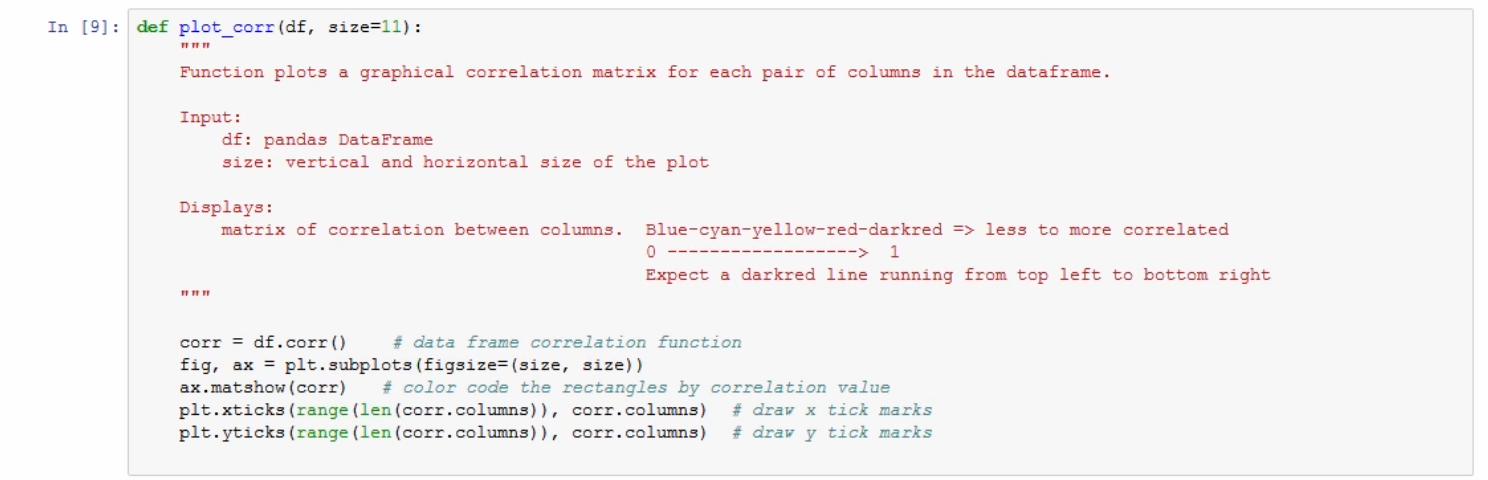

In [ ]:
pima_data.corr()

In [ ]:
del pima_data['skin']

In [ ]:
pima_data.head()

# Check Data Types

In [ ]:
diabetes_map = {True: 1, False: 0}

In [ ]:
# Pandas makes dealing with huge table of data very simple
pima_data['diabetes'] = pima_data['diabetes'].map(diabetes_map)

In [ ]:
pima_data.head()

## Check true/false ration

In [ ]:
num_true =  len(pima_data.loc[pima_data['diabetes'] == True])
num_false =  len(pima_data.loc[pima_data['diabetes'] == False])
print ("Number of true cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print ("Number of false cases: {0} ({1:2.2f}%)".format(num_true, (num_false/ (num_true + num_false)) * 100))

### Splitting the data
70% for training, 30% for testing

In [8]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predict_class_names = ['diabetes']

x = pima_data[feature_col_names].values
y = pima_data[predict_class_names].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
# random_state: If we run the function again split will be identical, any number can be used.

/home/haque/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We check to ensure we have the desired 70% train, 30% test split of the data

In [ ]:
print("{0:0.2f}% in training set".format((len(x_train)/len(pima_data.index))* 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(pima_data.index))* 100))

## Verifying Predicted value was split correctly

In [ ]:
print ("Original True: {0} ({1:2.2f}%)".format(len(pima_data.loc[pima_data['diabetes'] == 1]), (len(pima_data.loc[pima_data['diabetes'] == 1])/len(pima_data.index)) * 100))
print ("Original False: {0} ({1:2.2f}%)".format(len(pima_data.loc[pima_data['diabetes'] == 0]), (len(pima_data.loc[pima_data['diabetes'] == 0])/len(pima_data.index)) * 100))
print("")
print ("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print ("Training False: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print ("Test True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print ("Test False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

## Post-split Data Preparation

### Hidden Missing Values

In [ ]:
pima_data.head()

Are these 0 values possible? or these are missing values

#### Impute with mean

In [10]:
from sklearn.preprocessing import Imputer

# Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## Training Initial Algorithm - Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB # There are multiple implementation algorithm of Naive Base we are using Gaussin

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

## Performance on Training Data
#### We have trained Model, let see how well it can predict values

In [15]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Acuracy: 0.7542



## Performance on Testing Data

In [18]:
# predict values using the testing data
nb_predict_test = nb_model.predict(x_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Acuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Acuracy: 0.7359



#### Metrics

In [19]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower rith
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42) # create random forest object
rf_model.fit(x_train, y_train.ravel())

/home/haque/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Predicting Training Data

In [21]:
rf_predict_train = rf_model.predict(x_train)
# training metrics
print("Acuracy: {0:4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Acuracy: 0.986965


## Predict Test Data

In [22]:
rf_predict_test = rf_model.predict(x_test)
# training metrics
print("Acuracy: {0:4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Acuracy: 0.709957


Huge drop here from training data ....

In [23]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower rith
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

Confusion Matrix
[[ 43  37]
 [ 30 121]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42) # Regularization hyperparameter is set to 0.7
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

# training metrics
print("Acuracy: {0:4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

Acuracy: 0.744589
[[ 44  36]
 [ 23 128]]

Classification Report
             precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



We have to imrove the recall score here

1st max value of 0.613 occured at C=1.400


Text(0,0.5,'recall score')

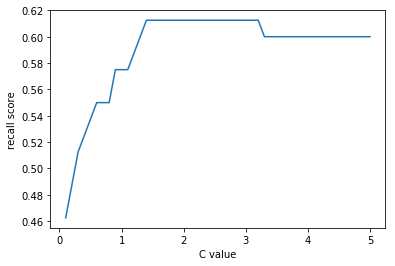

In [35]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

We still don't have recall value 70% with 1.400 C_value .. 

Unbalanced Classes: Actuallly our data has more non diabetes result from diabetes result, perhaps this is casing this issue

#### Logistic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


Text(0,0.5,'recall score')

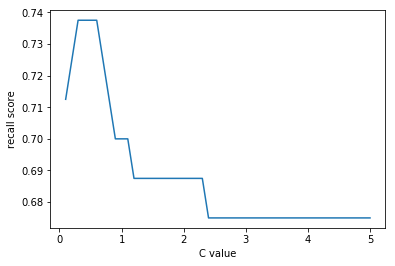

In [37]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight='balanced', random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [44]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', C=best_score_C_val, random_state=42) # Regularization hyperparameter is set to 0.7
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

# training metrics
print("Acuracy: {0:4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Acuracy: 0.714286
[[ 59  21]
 [ 45 106]]

Classification Report
             precision    recall  f1-score   support

          1       0.57      0.74      0.64        80
          0       0.83      0.70      0.76       151

avg / total       0.74      0.71      0.72       231

0.7375


#### Let's add Cross Validation - LogisticRegressionCV

In [46]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, Cs=3, cv=10, refit=True, class_weight='balanced') # number of fold 10
lr_cv_model.fit(x_train, y_train.ravel())
lr_cv_predict_test = lr_cv_model.predict(x_test)

#### Predict on test Data

In [49]:

# training metrics
print("Acuracy: {0:4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Acuracy: 0.701299
[[ 53  27]
 [ 42 109]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.66      0.61        80
          0       0.80      0.72      0.76       151

avg / total       0.72      0.70      0.71       231

